In [40]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn as skl



# Import our input dataset
avg_df = pd.read_csv('../Resources1/2017-2019_price.csv')
avg_df.head(10)



,RegionName,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,...,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019
0,"New York, NY","$386,000.00","$387,000.00","$387,000.00","$390,333.00","$395,000.00","$406,667.00","$420,000.00","$426,667.00","$425,000.00",...,"$407,500.00","$407,500.00","$410,833.00","$421,667.00","$431,667.00","$435,667.00","$432,333.00","$425,667.00","$421,667.00","$420,000.00"
1,"Los Angeles-Long Beach-Anaheim, CA","$571,833.00","$570,167.00","$577,498.00","$589,165.00","$602,498.00","$609,667.00","$615,000.00","$617,917.00","$619,583.00",...,"$633,167.00","$643,931.00","$649,098.00","$653,431.00","$661,000.00","$662,667.00","$661,667.00","$654,167.00","$652,667.00","$654,333.00"
2,"Chicago, IL","$211,333.00","$211,333.00","$216,200.00","$224,867.00","$234,833.00","$241,800.00","$243,467.00","$240,900.00","$233,400.00",...,"$228,667.00","$236,000.00","$244,000.00","$249,333.00","$251,000.00","$249,333.00","$243,333.00","$238,333.00","$235,000.00","$234,333.00"
3,"Dallas-Fort Worth, TX","$236,500.00","$239,000.00","$242,333.00","$249,667.00","$256,667.00","$261,333.00","$261,643.00","$259,583.00","$254,917.00",...,"$259,193.00","$265,823.00","$272,823.00","$277,355.00","$280,092.00","$278,425.00","$274,333.00","$271,667.00","$270,000.00","$271,833.00"
4,"Philadelphia, PA","$226,333.00","$221,333.00","$217,667.00","$222,000.00","$231,000.00","$243,633.00","$249,300.00","$250,967.00","$243,000.00",...,"$231,884.00","$236,584.00","$245,918.00","$255,000.00","$262,667.00","$266,633.00","$260,633.00","$253,300.00","$248,333.00","$249,000.00"
5,"Houston, TX","$218,333.00","$217,000.00","$217,740.00","$223,574.00","$228,574.00","$231,833.00","$232,667.00","$231,667.00","$229,333.00",...,"$232,227.00","$238,333.00","$244,333.00","$249,000.00","$250,667.00","$251,000.00","$247,333.00","$243,967.00","$242,933.00","$245,449.00"
6,"Washington, DC","$378,124.00","$377,791.00","$373,084.00","$381,874.00","$394,540.00","$405,895.00","$408,648.00","$405,948.00","$397,596.00",...,"$398,000.00","$407,012.00","$417,897.00","$422,897.00","$425,885.00","$423,331.00","$414,998.00","$409,964.00","$409,967.00","$416,967.00"
7,"Miami-Fort Lauderdale, FL","$255,000.00","$253,333.00","$252,500.00","$255,867.00","$260,533.00","$268,033.00","$272,000.00","$275,667.00","$272,333.00",...,"$279,750.00","$283,167.00","$286,929.00","$289,429.00","$295,096.00","$297,167.00","$295,333.00","$295,000.00","$298,333.00","$301,000.00"
8,"Atlanta, GA","$210,667.00","$210,667.00","$211,667.00","$217,000.00","$222,023.00","$225,566.00","$227,566.00","$226,543.00","$223,167.00",...,"$242,165.00","$246,333.00","$253,667.00","$259,000.00","$263,667.00","$262,750.00","$260,733.00","$257,400.00","$257,983.00","$260,000.00"
9,"Boston, MA","$398,833.00","$393,833.00","$398,333.00","$401,667.00","$415,000.00","$425,550.00","$434,717.00","$436,383.00","$428,500.00",...,"$437,900.00","$441,633.00","$458,233.00","$474,900.00","$484,833.00","$484,000.00","$472,333.00","$461,667.00","$454,000.00","$457,333.00"


In [41]:
# Our scatter plot here

In [42]:
Houston_df = avg_df[avg_df['RegionName'] == 'Houston, TX'].copy()
Houston_df.drop(columns = "RegionName", inplace=True)

In [43]:
# remove this if you have the clean csv, this one hasn't been cleaned
Houston_df = Houston_df.transpose()
Houston_df.rename(columns={5:"Price"}, inplace=True)
Houston_df["Price"] = Houston_df["Price"].map(
    lambda x: int(x.replace(",", "")[1:-4]))
Houston_df

,Price
1/31/2017,218333
2/28/2017,217000
3/31/2017,217740
4/30/2017,223574
5/31/2017,228574
6/30/2017,231833
7/31/2017,232667
8/31/2017,231667
9/30/2017,229333
10/31/2017,228332


In [44]:
# converting the index to datetime makes matplotlib format better
Houston_df.index = pd.to_datetime(Houston_df.index)
Houston_df

,Price
2017-01-31,218333
2017-02-28,217000
2017-03-31,217740
2017-04-30,223574
2017-05-31,228574
2017-06-30,231833
2017-07-31,232667
2017-08-31,231667
2017-09-30,229333
2017-10-31,228332


In [45]:
dates = Houston_df.index.values
y = Houston_df.Price.values

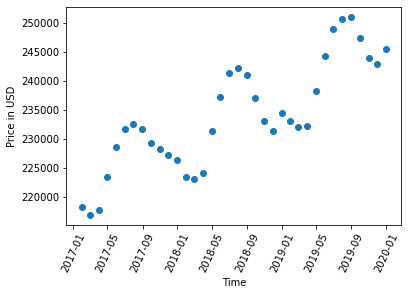

In [46]:
plt.scatter(dates, y)
plt.xlabel('Time')
plt.xticks(rotation = 65)
plt.ylabel('Price in USD')
plt.show()

In [47]:
X = np.array(range(0, len(dates))).reshape(-1, 1)
y = y.reshape(-1, 1)

In [48]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [49]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [50]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [52]:

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=12, activation="relu", input_dim=2))

In [53]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=36, activation="sigmoid"))

In [54]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_3 (Dense)              (None, 36)                468       
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\dmand\anaconda3\envs\mlenv\lib\site-packages\keras\engine\input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)
